## DIGIRISE INFOLABS INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## ML AND DATASCIENCE INTERNSHIP

### PROBLEM STATEMENT : HANDWRITTEN DIGIT RECOGNITION

Develop a machine learning model that can accurately recognize and classify handwritten digits from input images. The goal is to provide an automated solution for digit recognition tasks, such as reading postal codes or recognizing handwritten digits on forms, and to improve efficiency and accuracy in these tasks. You can you MNIST dataset for training and use the custom images for testing. Dataset link https://www.kaggle.com/competitions/digit-recognizer/overview

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#### IMPORTING LIBRARIES

In [2]:
!pip install keras_tuner

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import seaborn as sns
import keras_tuner
import keras
import tensorflow as tf
import gc

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### READING THE DATASETS

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

#### EXPLORATORY ANALYSIS OF THE DATASET

In [5]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


<Axes: xlabel='label', ylabel='count'>

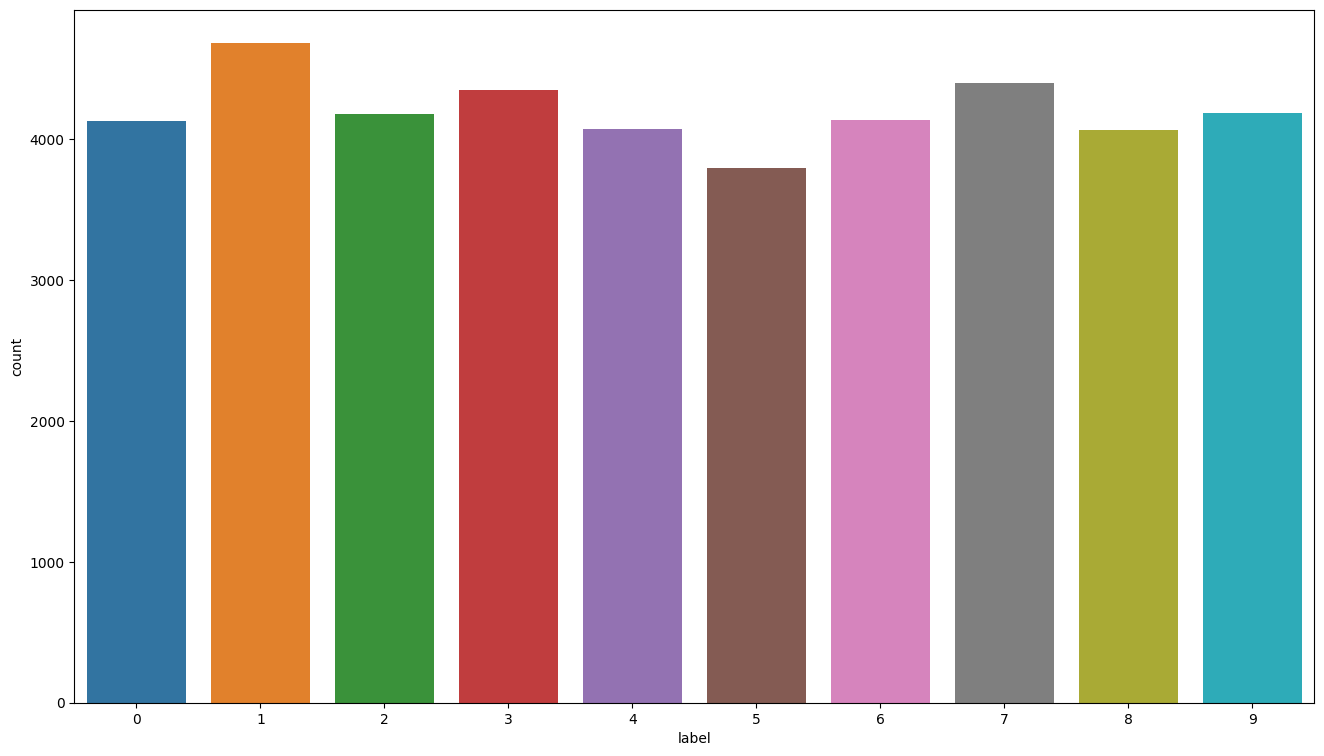

In [6]:
plt.figure(figsize = (16,9))
sns.countplot(train, x = 'label')

#### SEPARATING THE PIXEL DATA AND DIGIT LABEL

In [7]:
label_train = train['label']
pixel_train = train
pixel_test = test
pixel_train = pixel_train.drop('label', axis = 1)

label_train = np.array(label_train)
pixel_train = np.array(pixel_train)
pixel_test = np.array(pixel_test)

pixel_train = pixel_train.reshape(42000,28,28,1)
pixel_test = pixel_test.reshape(28000,28,28,1)
gc.collect()

25

In [8]:
print (" The shape of pixel_train is : " + str(pixel_train.shape))
print (" The shape of label_train is : " + str(label_train.shape))
print (" The shape of pixel_test is : " + str(pixel_test.shape))

 The shape of pixel_train is : (42000, 28, 28, 1)
 The shape of label_train is : (42000,)
 The shape of pixel_test is : (28000, 28, 28, 1)


In [9]:
def show_train_img(int):
    cap = label_train[int]
    pixels = pixel_train[int]
    plt.figure(figsize = (4,4))
    plt.imshow(pixels)
    plt.xlabel(str(cap))
    plt.show
    
def show_test_img(int):
    pixels = pixel_test[int]
    plt.figure(figsize = (4,4))
    plt.imshow(pixels)
    plt.show

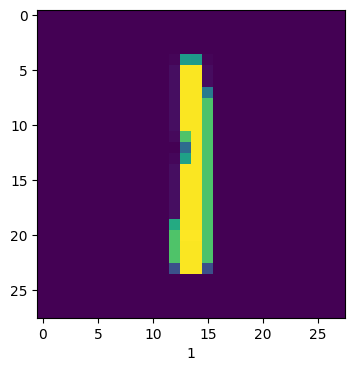

In [10]:
show_train_img(2)

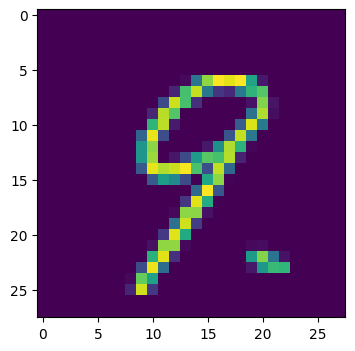

In [11]:
show_test_img(2)

#### DATA SCALING

In [12]:
pixel_train = pixel_train * (1./255)
pixel_test = pixel_test * (1./255)
gc.collect()

3380

#### TRAIN TEST SPLIT

In [13]:
x_train, x_test, y_train, y_test = train_test_split(pixel_train, label_train, test_size = 0.2, shuffle = True, random_state = 69)

#### GETTING THE BEST FIT MODEL

In [14]:
def build_model(hp):
    
    model = keras.models.Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

    model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dense(10,activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

    return model

In [15]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 100, directory='output', project_name="digit_recognition")

tuner_search.search(x_train, y_train,epochs = 5, batch_size =256, validation_split=0.1)

Trial 100 Complete [00h 00m 06s]
val_accuracy: 0.8613095283508301

Best val_accuracy So Far: 0.9720237851142883
Total elapsed time: 00h 09m 41s


In [16]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 584, 'dense_1_activation': 'elu', 'dense_1_kernel_initializer': 'random_normal', 'dropout_1_rate': 0.35, 'dense_2_units': 224, 'dense_2_activation': 'relu', 'dense_2_kernel_initializer': 'random_normal', 'dropout_2_rate': 0.1, 'dense_3_units': 1016, 'dense_3_activation': 'selu', 'dense_3_kernel_initializer': 'he_normal', 'dropout_3_rate': 0.15000000000000002, 'dense_4_units': 272, 'dense_4_activation': 'relu', 'dense_4_kernel_initializer': 'glorot_normal', 'learning_rate': 0.001}


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7dc0a8d94e20>>


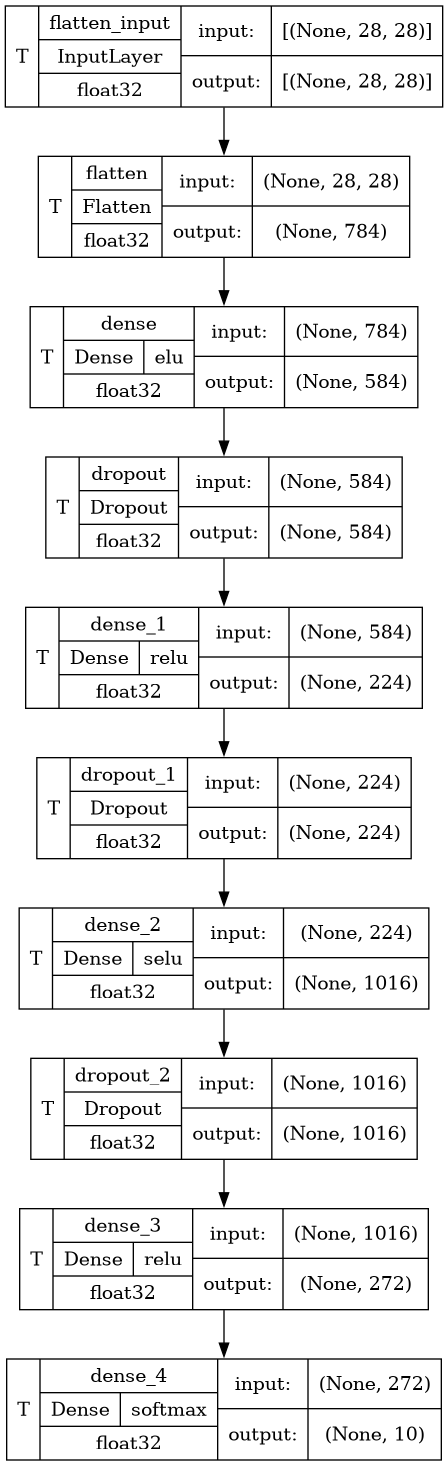

In [17]:
print(model.summary)
model_name='/kaggle/working/digit_detector.png'
keras.utils.plot_model(model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### FINAL MODEL IMPLEMENTATION

In [18]:
digits_detector = model

In [19]:
digits_detector.fit(x_train, y_train, epochs = 100, batch_size = 256, validation_split = 0.2)

Epoch 1/100
105/105 [==============================] - 2s 6ms/step - loss: 0.0985 - accuracy: 0.9681 - val_loss: 0.0834 - val_accuracy: 0.9746
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.9701 - val_loss: 0.0841 - val_accuracy: 0.9751
Epoch 3/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9758 - val_loss: 0.0941 - val_accuracy: 0.9720
Epoch 4/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 5/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 6/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0602 - accuracy: 0.9799 - val_loss: 0.0911 - val_accuracy: 0.9763
Epoch 7/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.1009 - val_accuracy: 0.9741

#### EVALUATION OF THE CLASSIFIER

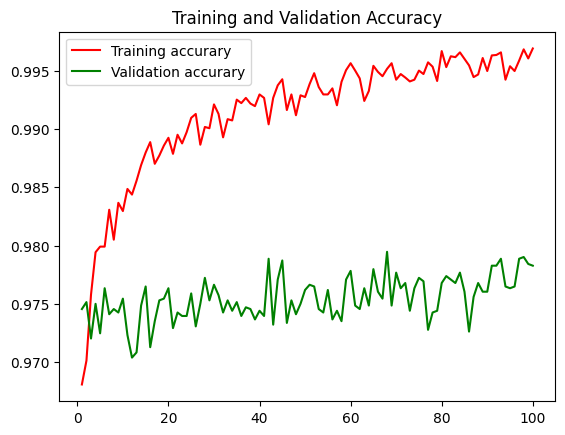

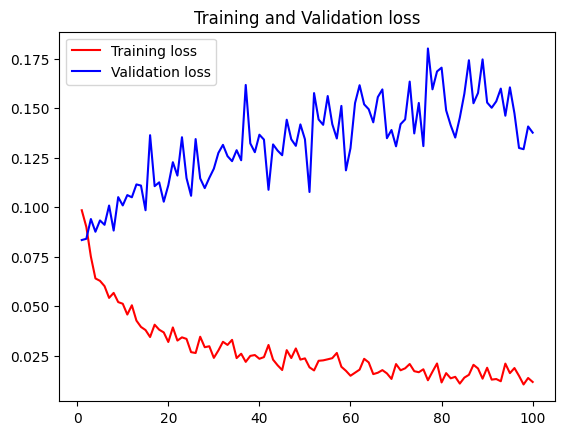

In [20]:
acc=digits_detector.history.history['accuracy']
val_acc=digits_detector.history.history['val_accuracy']
loss=digits_detector.history.history['loss']
val_loss=digits_detector.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [21]:
y_probability= digits_detector.predict(x_test)
y_predict = np.argmax(y_probability,axis=1)

263/263 [==============================] - 0s 1ms/step


The classification test results are : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       814
           1       0.99      0.99      0.99       965
           2       0.98      0.99      0.98       816
           3       0.96      0.98      0.97       880
           4       0.98      0.98      0.98       821
           5       0.98      0.97      0.98       740
           6       0.99      0.99      0.99       806
           7       0.98      0.99      0.98       871
           8       0.98      0.97      0.98       821
           9       0.98      0.95      0.96       866

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



The test accuracy percentage is :
97.96428571428571


The test precision percentage is :
97.96428571428571


The test recall percentage is :
97.96428571428571


The test f1 percentage is :
97.9642857

<Axes: >

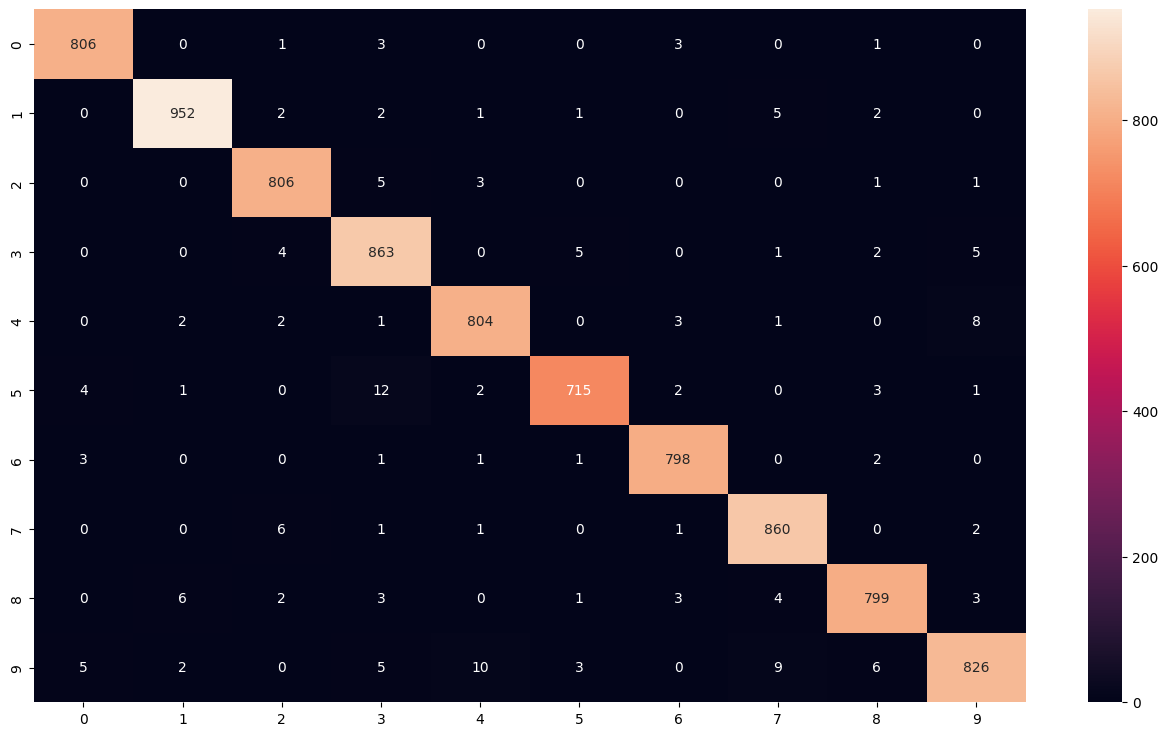

In [22]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print(roc_auc_score(y_test,y_probability,multi_class = 'ovr'))

print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize = (16,9))
sns.heatmap(cm, annot = True, fmt = 'g')

#### TEST CSV IMPLEMENTATION

In [23]:
test_labels_predicted = np.argmax(digits_detector.predict(pixel_test), axis = 1)
test_predictions = (test_labels_predicted).tolist()
test_digits = pd.Series((test_predictions))

875/875 [==============================] - 1s 1ms/step


In [24]:
test_dataset_final = pd.concat([test,test_digits],axis = 1)
test_dataset_final.columns.values[784] = 'Predicted_Labels'

In [25]:
test_dataset_final.to_csv('/kaggle/working/Processed_Test_Data.csv', index = False)

#### REAL TIME TEST

In [26]:
real_test = pd.read_csv('/kaggle/working/Processed_Test_Data.csv')
real_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Predicted_Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [27]:
def show_digit(int):
    pixels = np.array(real_test.iloc[int,:784])
    cap = real_test.iloc[int,784]
    plt.imshow(pixels.reshape(28,28,1))
    plt.xlabel('Predicted_Digit : ' + str(cap))
    plt.show

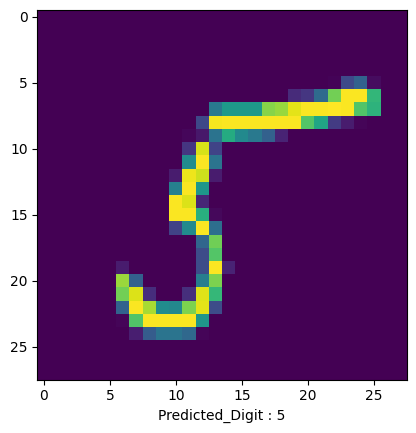

In [28]:
show_digit(23)

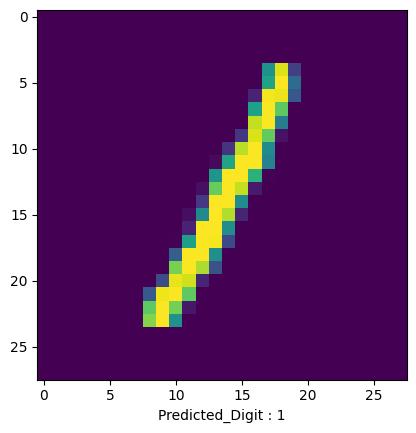

In [29]:
show_digit(56)

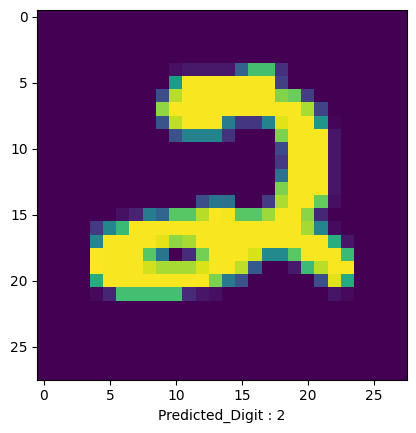

In [30]:
show_digit(0)

#### SAVING THE MODEL

In [31]:
pickle.dump(digits_detector ,open('/kaggle/working/digits_detector.pkl','wb'))